In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_float64(fileIn):
    with open(fileIn, 'rb') as f:
        data = np.fromfile(f, dtype=np.dtype('>f8'))
        print(np.shape(data))
    return data

def read_float32(fileIn):
    with open(fileIn, 'rb') as f:
        data = np.fromfile(f, dtype=np.dtype('>f'))
        print(np.shape(data))
    return data

def write_float32(fout,fld):
    with open(fout, 'wb') as f:
        np.array(fld, dtype=">f").tofile(f)

In [3]:
def patchface3D(fldin,nx,nz):

    print(nz)
    #add a new dimension in case it's only 2d field:
    if nz == 1:
        fldin=fldin[np.newaxis, :, :]

    #defining a big face:
    a=np.zeros((nz,4*nx,4*nx))       #(50,270,360)

    #face1
    tmp=fldin[:,0:3*nx,0:nx]        #(50,270,90)
    a[:,0:3*nx,0:nx]=tmp

    #face2
    tmp=fldin[:,(3*nx):(6*nx),0:nx] #(50, 270,90)
    a[:,0:3*nx,nx:2*nx]=tmp

    #face3
    tmp=fldin[:,(6*nx):(7*nx),0:nx] #(50, 90, 90)
    tmp=np.transpose(tmp, (1,2,0))  #(90, 90, 50)
    ##syntax to rotate ccw:
    tmp1=list(zip(*tmp[::-1]))
    tmp1=np.asarray(tmp1)
    tmp1=np.transpose(tmp1,[2,0,1]) #(50, 90, 90)
    a[:,3*nx:4*nx,0:nx]=tmp1

    #face4
    tmp=np.reshape(fldin[:,7*nx:10*nx,0:nx],[nz,nx,3*nx]) #(50,90,270)
    tmp=np.transpose(tmp, (1,2,0))
    print(tmp.shape)                                      #(90,270,50)
    #syntax to rotate cw:
    tmp1=list(zip(*tmp))[::-1]      #type is <class 'list'>
    tmp1=np.asarray(tmp1)           #type <class 'numpy.ndarray'>, shape (270,90,50)
    tmp1=np.transpose(tmp1,[2,0,1]) #(50,270,90)
    a[:,0:3*nx,2*nx:3*nx]=tmp1

    #face5
    tmp=np.reshape(fldin[:,10*nx:13*nx,0:nx],[nz,nx,3*nx]) #(50,90,270)
    tmp=np.transpose(tmp, (1,2,0))                         #(90,270,50)
    tmp1=list(zip(*tmp))[::-1]      #type is <class 'zip'> --> <class 'list'>
    tmp1=np.asarray(tmp1)           #type <class 'numpy.ndarray'>, shape (270,90,50)
    tmp1=np.transpose(tmp1,[2,0,1]) #(50,270,90)
    a[:,0:3*nx,3*nx:4*nx]=tmp1

    return a


## Initial Conditions

In [4]:
dirrun = '/nobackup/dcarrol2/v05_latest/darwin3/run/'
pickup = read_float64(dirrun + 'pickup.0000525960.data')
pickup

(381923100,)


array([0., 0., 0., ..., 0., 0., 0.])

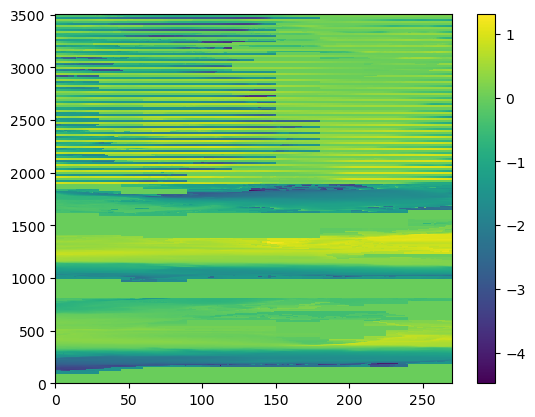

In [5]:
nx = 270
ny = 3510
nz = 50

#theta, salt, uvel, vvel 3d
#etan 2d

uvel = pickup[:nx*ny*nz]
#uvel = uvel.reshape((nz, ny, nx))

vvel = pickup[nx*ny*nz:2*nx*ny*nz]
#vvel = vvel.reshape((nz, ny, nx))

theta = pickup[2*nx*ny*nz:3*nx*ny*nz]
#theta = theta.reshape((nz, ny, nx))

salt = pickup[3*nx*ny*nz:4*nx*ny*nz]
#salt = salt.reshape((nz, ny, nx))

#g = pickup[4*nx*ny*nz:8*nx*ny*nz] # g's are 3d fields

etan = pickup[8*nx*ny*nz:8*nx*ny*nz + nx*ny]
#etan = etan.reshape((ny, nx))

plt.pcolormesh(etan.reshape((ny,nx)))
plt.colorbar()


1
(270, 810, 1)


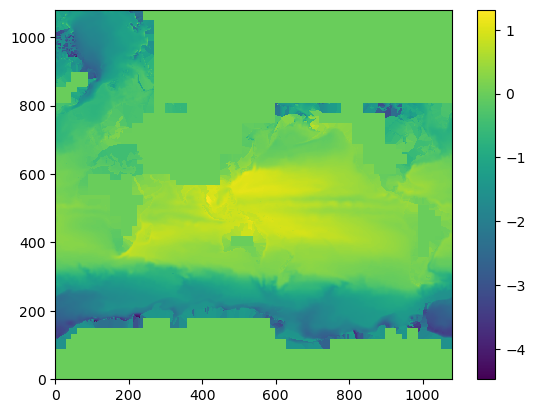

In [6]:
etan_world = patchface3D(etan.reshape((ny,nx)),270,1)

plt.pcolor(etan_world[0,:,:])
plt.colorbar()



In [7]:
etan.shape

(947700,)

In [8]:
dirtemp = '/nobackup/sreich/llc270_c68w_runs/run_template_bkp/'

# write_float32(dirtemp + 'U.0000525960.data', uvel)
# write_float32(dirtemp + 'V.0000525960.data', vvel)
# write_float32(dirtemp + 'Theta.0000525960.data', theta)
# write_float32(dirtemp + 'Salt.0000525960.data', salt)
# write_float32(dirtemp + 'Eta.0000525960.data', etan)

In [9]:
len(theta[theta == 0]), len(theta)

(25878741, 47385000)

(47385000,)
50
(270, 810, 50)


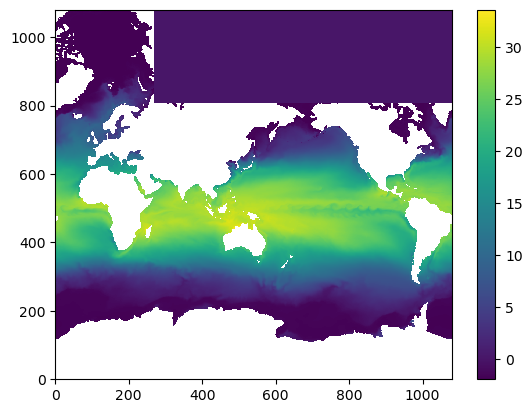

In [10]:
hfacc = read_float32('/nobackup/dcarrol2/v05_latest/darwin3/run/hFacC.data')

hfacc[hfacc == 0] = np.nan

theta_land = hfacc * theta

plt.pcolor(patchface3D(theta_land.reshape((nz,ny,nx)),270,nz)[0,:,:])
plt.colorbar()


In [11]:
np.unique(np.abs(theta_land), return_counts = True)

(array([1.95868360e-07, 3.78412390e-07, 8.53979497e-07, ...,
        3.33257994e+01, 3.36386064e+01,            nan]),
 array([       1,        1,        1, ...,        1,        1, 25878741]))

In [11]:
theta32 = read_float32(dirtemp + 'Theta.0000525960.data')

theta32_land = hfacc * theta32

(47385000,)


In [13]:
len(theta32_land[theta32_land == 0]), len(theta32)
np.unique(np.abs(theta32_land), return_counts=True)

(array([1.9586837e-07, 3.7841238e-07, 8.5397949e-07, ..., 3.3325798e+01,
        3.3638607e+01,           nan], dtype=float32),
 array([       1,        1,        1, ...,        1,        1, 25878741]))

In [91]:
np.sum(np.float32(theta) - theta32)



0.0

50
(270, 810, 50)


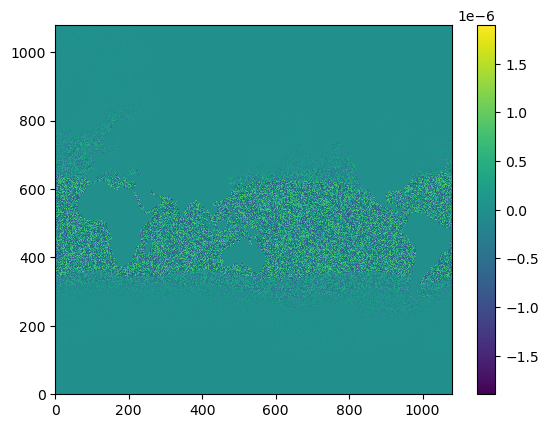

In [24]:
diff = theta - theta32

diff_world = patchface3D(diff.reshape((nz,ny,nx)),270,50)

plt.pcolor(diff_world[0,:,:])
plt.colorbar()

(47385000,)
50
(270, 810, 50)


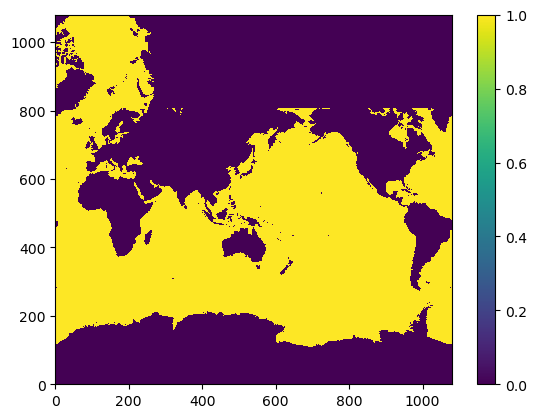

In [25]:
hfacc = read_float32('/nobackup/dcarrol2/v05_latest/darwin3/run/hFacC.data')

hfacc_world = patchface3D(hfacc.reshape((nz,ny,nx)),270,50)

plt.pcolor(hfacc_world[0,:,:])
plt.colorbar()

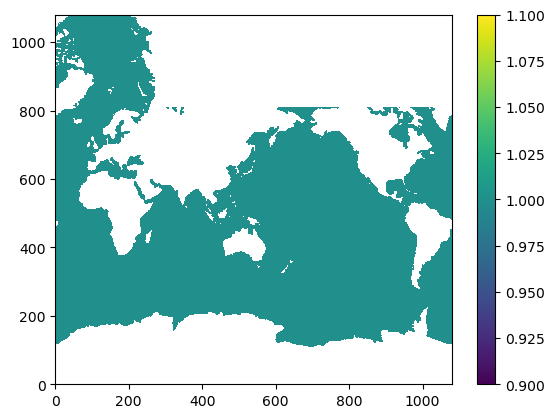

In [26]:
hfacc_world[hfacc_world == 0] = np.nan

plt.pcolor(hfacc_world[0,:,:])
plt.colorbar()

In [27]:
hfacc[hfacc == 0] = np.nan
theta32_h = hfacc * theta32
theta_h = hfacc * theta



50
(270, 810, 50)


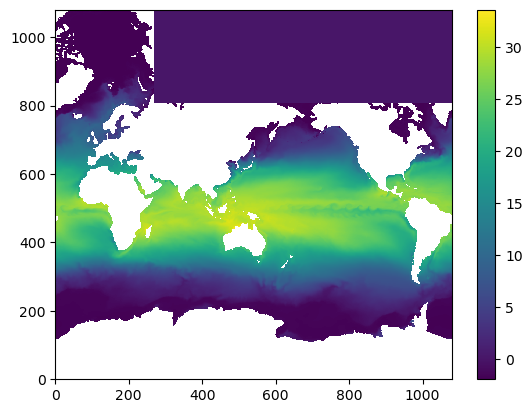

In [30]:
diff_h = theta_h - theta32_h

theta_h_wrl = patchface3D(theta_h.reshape((nz,ny,nx)),270,50)

plt.pcolor(theta_h_wrl[0,:,:])
plt.colorbar()

In [36]:
len(theta_h[theta_h == 0])#, len(theta32_h[theta32_h == 0])

theta_h[theta_h == 0]

array([], dtype=float64)

## Seaice Data

In [33]:
si = read_float64(dirrun + 'pickup_seaice.0000525960.data')
si

(5686200,)


array([0., 0., 0., ..., 0., 0., 0.])

In [34]:
# all are 2d fields

area = si[:nx*ny]
snow = si[nx*ny:2*nx*ny]
salt = si[2*nx*ny:3*nx*ny]
heff = si[3*nx*ny:4*nx*ny]
uice = si[4*nx*ny:5*nx*ny]
vice = si[5*nx*ny:6*nx*ny]

In [36]:
# write_float32(dirtemp + 'SIarea.0000525960.data', area)
# write_float32(dirtemp + 'SIsnow.0000525960.data', snow)
# write_float32(dirtemp + 'SIsalt.0000525960.data', salt)
# write_float32(dirtemp + 'SIheff.0000525960.data', heff)
# write_float32(dirtemp + 'SIuice.0000525960.data', uice)
# write_float32(dirtemp + 'SIvice.0000525960.data', vice)

## tref

In [ ]:
import csv
with open('/nobackup/sreich/llc270_c68w_runs/k_tref', mode='r') as csvfile:
  csvFile = csv.reader(file)
  for lines in csvFile:
        print(lines)

In [15]:
import pandas as pd
tref = pd.read_csv('/nobackup/sreich/llc270_c68w_runs/k_tref')

tref = tref[tref.k != 'k']
tref

/var/tmp/pbs.19368735.pbspl1.nas.nasa.gov/ipykernel_22866/2030056100.py:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  tref = pd.read_csv('/nobackup/sreich/llc270_c68w_runs/k_tref')


,k,tRef
0,1,0.23000000E+02
1,1,0.23000000E+02
2,1,0.23000000E+02
3,1,0.23000000E+02
4,1,0.23000000E+02
...,...,...
50368682,46,1.0
50368683,46,1.0
50368684,46,1.0
50368685,46,1.0


In [36]:
tref.k = tref.k.astype(int)
tref[' tRef'] = tref[' tRef'].astype(float)
tref.drop_duplicates(inplace=True)

tref

/var/tmp/pbs.19368735.pbspl1.nas.nasa.gov/ipykernel_22866/3736946420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tref.k = tref.k.astype(int)
/var/tmp/pbs.19368735.pbspl1.nas.nasa.gov/ipykernel_22866/3736946420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tref[' tRef'] = tref[' tRef'].astype(float)
/var/tmp/pbs.19368735.pbspl1.nas.nasa.gov/ipykernel_22866/3736946420.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

,k,tRef
0,1,23.0
342770,2,23.0
971004,3,23.0
1566966,4,22.0
2310525,5,22.0
3111782,6,22.0
4003222,7,21.0
4951957,8,20.0
5809680,9,20.0
6762346,10,19.0


Index(['k', ' tRef'], dtype='object')

## theta

In [37]:
theta_df = pd.read_csv('/nobackup/sreich/llc270_c68w_runs/maskc_theta_2')
theta_df

/var/tmp/pbs.19368735.pbspl1.nas.nasa.gov/ipykernel_22866/3843177737.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  theta_df = pd.read_csv('/nobackup/sreich/llc270_c68w_runs/maskc_theta_2')


,maskC,theta
0,0.00000000E+00,0.00000000E+00
1,0.00000000E+00,0.00000000E+00
2,0.00000000E+00,0.00000000E+00
3,0.00000000E+00,0.00000000E+00
4,0.00000000E+00,0.00000000E+00
...,...,...
32369502,0.0,0.0
32369503,0.0,0.0
32369504,0.0,0.0
32369505,0.0,0.0


In [41]:
np.unique(theta_land, return_counts=True)

(array([-1.97870867, -1.9739682 , -1.97298585, ..., 33.32579936,
        33.63860638,         nan]),
 array([       1,        1,        1, ...,        1,        1, 25878741]))

In [55]:
theta_df = theta_df[theta_df[' theta'] != ' theta']

theta_df['maskC'] = theta_df['maskC'].astype(float)
theta_df[' theta'] = theta_df[' theta'].astype(float)
theta_df

,maskC,theta
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
32369502,0.0,0.0
32369503,0.0,0.0
32369504,0.0,0.0
32369505,0.0,0.0


In [59]:
in1d = np.in1d(np.unique(theta_df[' theta']), np.unique(theta_land))
np.unique(theta_df[' theta'])[in1d]

array([], dtype=float64)

In [71]:
def trunc(values, decs=0):
    return np.trunc(values*10**decs)/(10**decs)

In [76]:
theta_out = trunc(np.unique(theta_df[' theta']), 5)
theta_in = trunc(np.unique(theta_land), 5)

In [81]:
in1d = np.in1d(theta_out, theta_in)

np.unique(in1d, return_counts=True)

(array([False,  True]), array([   22880, 13487075]))

In [85]:
df = theta_df[theta_df['maskC'] == 1]
np.sum(df[' theta'] == 0)

37029

## compare to diags

In [12]:
diagdir = '/nobackup/dcarrol2/v05_latest/darwin3/run/diags/monthly/'

theta_diag = read_float32(diagdir + 'THETA.0000525960.data')
theta_diag

(47385000,)


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

50
(270, 810, 50)


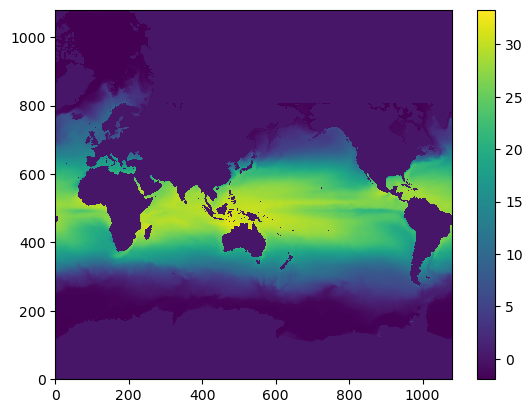

In [20]:
theta_diag_wrl = patchface3D(theta_diag.reshape((nz,ny,nx)),270,50)

plt.pcolor(theta_diag_wrl[0,:,:])
plt.colorbar()

50
(270, 810, 50)


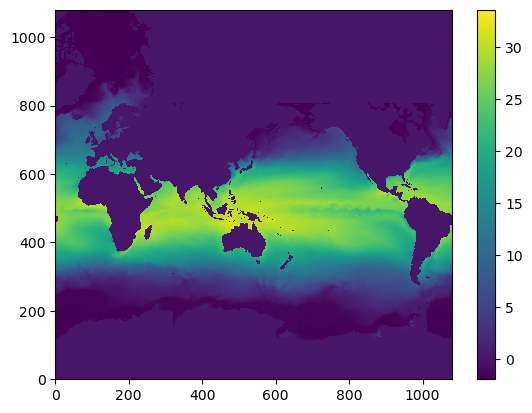

In [19]:
theta_wrl = patchface3D(theta.reshape((nz,ny,nx)),270,50)

plt.pcolor(theta_wrl[0,:,:])
plt.colorbar()

In [25]:
salt_diag = read_float32(diagdir + 'SALTanom.0000525960.data')
np.sum(salt_diag - salt)

(47385000,)


-1208024190.5603426

50
(270, 810, 50)


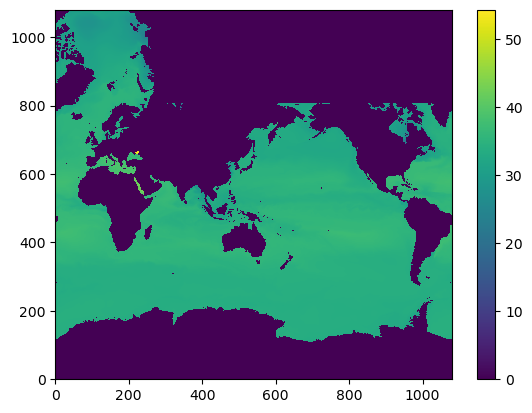

In [27]:
salt_wrl = patchface3D(salt.reshape((nz,ny,nx)),270,50)

plt.pcolor(salt_wrl[0,:,:])
plt.colorbar()

50
(270, 810, 50)


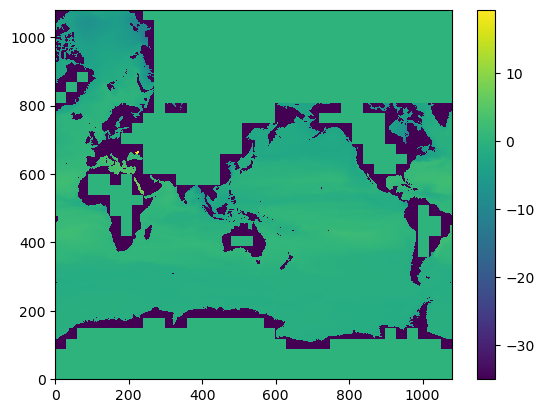

In [28]:
salt_diag_wrl = patchface3D(salt_diag.reshape((nz,ny,nx)),270,50)

plt.pcolor(salt_diag_wrl[0,:,:])
plt.colorbar()

In [29]:
tmp = salt*hfacc
tmp2 = salt_diag*hfacc

tmp-tmp2

array([nan, nan, nan, ..., nan, nan, nan])

In [31]:
np.unique(tmp vim - tmp2)

array([10.49577642, 10.49855708, 10.498575  , ..., 37.41460815,
       37.93576692,         nan])

In [36]:
area_diag = read_float32(diagdir + 'SIarea.0000525960.data')

np.sum(area_diag - area)

(947700,)


-187027301.87582266